In [1]:
import pandas as pd
import numpy as np

# Define columns

In [2]:
train = pd.read_csv('train.csv')
train.drop(columns=['Name'],inplace=True)
train['Transported'] = train['Transported'].astype(int)

In [3]:
amenities = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

In [4]:
train[amenities] = train[amenities].fillna(0)
train['Amenities'] = train[amenities].sum(axis=1)

In [5]:
train[['GroupId', 'PassengerNumber']] = train['PassengerId'].str.split('_', expand=True)
train['PassengerNumber'] = train['PassengerNumber'].astype(int)
train['GroupId'] = train['GroupId'].astype(int)
train.drop(columns=['PassengerId'],inplace=True)

In [6]:
train[['Zone', 'Seat', 'Side']] = train['Cabin'].str.split('/', expand=True)
train.drop(columns=['Cabin'], inplace=True)

In [7]:
train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Amenities,GroupId,PassengerNumber,Zone,Seat,Side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,0,0.0,1,1,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,1,736.0,2,1,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,0,10383.0,3,1,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,0,5176.0,3,2,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,1091.0,4,1,F,1,S


# Treat NaN

In [8]:
train.isna().sum()

HomePlanet         201
CryoSleep          217
Destination        182
Age                179
VIP                203
RoomService          0
FoodCourt            0
ShoppingMall         0
Spa                  0
VRDeck               0
Transported          0
Amenities            0
GroupId              0
PassengerNumber      0
Zone               199
Seat               199
Side               199
dtype: int64

## HomePlanet

In [9]:
train['HomePlanet']= train['HomePlanet'].replace('Earth',0)
train['HomePlanet']= train['HomePlanet'].replace('Mars',1)
train['HomePlanet']= train['HomePlanet'].replace('Europa',2)
train['HomePlanet'].value_counts()

/var/folders/00/71bxx4k17bdbgdqtr4ng1w4c0000gn/T/ipykernel_11644/2865644417.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['HomePlanet']= train['HomePlanet'].replace('Europa',2)


HomePlanet
0.0    4602
2.0    2131
1.0    1759
Name: count, dtype: int64

In [10]:
print('Porcentaje de personas en HomePlanet:')
print(round(train['HomePlanet'].value_counts() / len(train) * 100, 2))

print('\nPagos en amenidades de HomePlanet = Earth:')
print(train[train['HomePlanet'] == 0][amenities].mean())
print('\nPagos en amenidades de HomePlanet = Mars:')
print(train[train['HomePlanet'] == 1][amenities].mean())
print('\nPagos en amenidades de HomePlanet = Europa:')
print(train[train['HomePlanet'] == 2][amenities].mean())
print('\nPagos en amenidades de HomePlanet = ???:')
print(train[train['HomePlanet'].isna()][amenities].mean())

Porcentaje de personas en HomePlanet:
HomePlanet
0.0    52.94
2.0    24.51
1.0    20.23
Name: count, dtype: float64

Pagos en amenidades de HomePlanet = Earth:
RoomService     133.875272
FoodCourt       134.336375
ShoppingMall    130.614515
Spa             139.710126
VRDeck          134.801173
dtype: float64

Pagos en amenidades de HomePlanet = Mars:
RoomService     541.581580
FoodCourt        53.187607
ShoppingMall    302.133030
Spa             107.965890
VRDeck           46.388857
dtype: float64

Pagos en amenidades de HomePlanet = Europa:
RoomService      142.778508
FoodCourt       1470.764430
ShoppingMall     147.374003
Spa              830.147349
VRDeck           860.560300
dtype: float64

Pagos en amenidades de HomePlanet = ???:
RoomService     196.736318
FoodCourt       260.024876
ShoppingMall    136.805970
Spa             228.303483
VRDeck          283.497512
dtype: float64


In [11]:
print('Porcentaje de personas en HomePlanet:')
print(round(train['HomePlanet'].value_counts() / len(train) * 100, 2))

print('\nPagos en amenidades de HomePlanet = Earth:')
print(train[train['HomePlanet'] == 0]['Amenities'].mean())
print('\nPagos en amenidades de HomePlanet = Mars:')
print(train[train['HomePlanet'] == 1]['Amenities'].mean())
print('\nPagos en amenidades de HomePlanet = Europa:')
print(train[train['HomePlanet'] == 2]['Amenities'].mean())
print('\nPagos en amenidades de HomePlanet = ???:')
print(train[train['HomePlanet'].isna()]['Amenities'].mean())

Porcentaje de personas en HomePlanet:
HomePlanet
0.0    52.94
2.0    24.51
1.0    20.23
Name: count, dtype: float64

Pagos en amenidades de HomePlanet = Earth:
673.3374619730552

Pagos en amenidades de HomePlanet = Mars:
1051.2569641841956

Pagos en amenidades de HomePlanet = Europa:
3451.6245893946502

Pagos en amenidades de HomePlanet = ???:
1105.3681592039802


In [12]:
train['HomePlanet'] = train['HomePlanet'].fillna(1)

In [13]:
train['HomePlanet'].isna().sum()

0

In [14]:
train['HomePlanet'].value_counts()

HomePlanet
0.0    4602
2.0    2131
1.0    1960
Name: count, dtype: int64

## CryoSleep

In [15]:
print('Porcentaje de personas en CryoSleep:')
print(round(train['CryoSleep'].value_counts() / len(train) * 100, 2))

print('\nPagos en amenidades de quienes están en CryoSleep:')
print(train[train['CryoSleep'] == True][amenities].mean())
print('\nPagos en amenidades de quienes NO están en CryoSleep:')
print(train[train['CryoSleep'] == False][amenities].mean())

Porcentaje de personas en CryoSleep:
CryoSleep
False    62.57
True     34.94
Name: count, dtype: float64

Pagos en amenidades de quienes están en CryoSleep:
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
dtype: float64

Pagos en amenidades de quienes NO están en CryoSleep:
RoomService     343.000919
FoodCourt       698.584299
ShoppingMall    265.412576
Spa             475.993933
VRDeck          465.307961
dtype: float64


In [16]:
train['CryoSleep'] = train['CryoSleep'].fillna(train.apply(lambda row: False if any(row[amenities] > 0) else True, axis=1))
train['CryoSleep'] = train['CryoSleep'].astype(bool)

/var/folders/00/71bxx4k17bdbgdqtr4ng1w4c0000gn/T/ipykernel_11644/139052112.py:1: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['CryoSleep'] = train['CryoSleep'].fillna(train.apply(lambda row: False if any(row[amenities] > 0) else True, axis=1))


In [17]:
train['CryoSleep'].value_counts()

CryoSleep
False    5558
True     3135
Name: count, dtype: int64

## Destination

In [18]:
train['Destination'].value_counts()

Destination
TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: count, dtype: int64

In [19]:
train['Destination']= train['Destination'].replace('TRAPPIST-1e',0)
train['Destination']= train['Destination'].replace('55 Cancri e',1)
train['Destination']= train['Destination'].replace('PSO J318.5-22',2)
train['Destination'].value_counts()

/var/folders/00/71bxx4k17bdbgdqtr4ng1w4c0000gn/T/ipykernel_11644/1204826497.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Destination']= train['Destination'].replace('PSO J318.5-22',2)


Destination
0.0    5915
1.0    1800
2.0     796
Name: count, dtype: int64

In [20]:
print('Porcentaje de personas en Destination:')
print(round(train['Destination'].value_counts() / len(train) * 100, 2))

print('\nPagos en amenidades de Destination = TRAPPIST-1e:')
print(train[train['Destination'] == 0][amenities].mean())
print('\nPagos en amenidades de Destination = 55 Cancri e:')
print(train[train['Destination'] == 1][amenities].mean())
print('\nPagos en amenidades de Destination = PSO J318.5-22:')
print(train[train['Destination'] == 2][amenities].mean())
print('\nPagos en amenidades de Destination = ???:')
print(train[train['Destination'].isna()][amenities].mean())

Porcentaje de personas en Destination:
Destination
0.0    68.04
1.0    20.71
2.0     9.16
Name: count, dtype: float64

Pagos en amenidades de Destination = TRAPPIST-1e:
RoomService     247.476923
FoodCourt       368.035503
ShoppingMall    183.121386
Spa             277.980558
VRDeck          261.725613
dtype: float64

Pagos en amenidades de Destination = 55 Cancri e:
RoomService     189.712222
FoodCourt       869.836667
ShoppingMall    153.495000
Spa             469.986667
VRDeck          497.255000
dtype: float64

Pagos en amenidades de Destination = PSO J318.5-22:
RoomService      88.211055
FoodCourt       119.731156
ShoppingMall    110.723618
Spa             115.629397
VRDeck          138.020101
dtype: float64

Pagos en amenidades de Destination = ???:
RoomService     203.390110
FoodCourt       331.291209
ShoppingMall    145.615385
Spa             359.994505
VRDeck          218.461538
dtype: float64


In [21]:
print('Porcentaje de personas en Destination:')
print(round(train['Destination'].value_counts() / len(train) * 100, 2))

print('\nPagos en amenidades de Destination = TRAPPIST-1e:')
print(train[train['Destination'] == 0]['Amenities'].mean())
print('\nPagos en amenidades de Destination = 55 Cancri e:')
print(train[train['Destination'] == 1]['Amenities'].mean())
print('\nPagos en amenidades de Destination = PSO J318.5-22:')
print(train[train['Destination'] == 2]['Amenities'].mean())
print('\nPagos en amenidades de Destination = ???:')
print(train[train['Destination'].isna()]['Amenities'].mean())

Porcentaje de personas en Destination:
Destination
0.0    68.04
1.0    20.71
2.0     9.16
Name: count, dtype: float64

Pagos en amenidades de Destination = TRAPPIST-1e:
1338.3399830938292

Pagos en amenidades de Destination = 55 Cancri e:
2180.2855555555557

Pagos en amenidades de Destination = PSO J318.5-22:
572.3153266331658

Pagos en amenidades de Destination = ???:
1258.7527472527472


In [22]:
train['Destination'] = train['Destination'].fillna(0)

## Age

In [23]:
train['age_group'] = np.where(pd.isna(train['Age']), np.nan, np.where(train['Age'] < 18, 0, 1))


In [24]:
train['age_group'].value_counts()

age_group
1.0    6969
0.0    1545
Name: count, dtype: int64

In [25]:
print('Porcentaje de personas en age_group:')
print(round(train['age_group'].value_counts() / len(train) * 100, 2))

print('\nPagos en amenidades de age_group = Menor de edad:')
print(train[train['age_group'] == 0]['Amenities'].mean())
print('\nPagos en amenidades de age_group = Mayor de edad:')
print(train[train['age_group'] == 1]['Amenities'].mean())
print('\nPagos en amenidades de age_group = ???:')
print(train[train['age_group'].isna()]['Amenities'].mean())

Porcentaje de personas en age_group:
age_group
1.0    80.17
0.0    17.77
Name: count, dtype: float64

Pagos en amenidades de age_group = Menor de edad:
398.93203883495147

Pagos en amenidades de age_group = Mayor de edad:
1675.551729085952

Pagos en amenidades de age_group = ???:
1297.1005586592178


In [26]:
print('Porcentaje de personas en age_group:')
print(round(train['age_group'].value_counts() / len(train) * 100, 2))

print('\nPagos en amenidades de age_group = Menor de edad:')
print(train[train['age_group'] == 0][amenities].mean())
print('\nPagos en amenidades de age_group = Mayor de edad:')
print(train[train['age_group'] == 1][amenities].mean())
print('\nPagos en amenidades de age_group = ???:')
print(train[train['age_group'].isna()][amenities].mean())

Porcentaje de personas en age_group:
age_group
1.0    80.17
0.0    17.77
Name: count, dtype: float64

Pagos en amenidades de age_group = Menor de edad:
RoomService      97.444013
FoodCourt        70.911327
ShoppingMall    106.266667
Spa              64.220065
VRDeck           60.089968
dtype: float64

Pagos en amenidades de age_group = Mayor de edad:
RoomService     248.572679
FoodCourt       533.184818
ShoppingMall    185.404649
Spa             356.714737
VRDeck          351.674846
dtype: float64

Pagos en amenidades de age_group = ???:
RoomService     165.849162
FoodCourt       407.340782
ShoppingMall     99.581006
Spa             349.865922
VRDeck          274.463687
dtype: float64


In [27]:
train['age_group'] = train['age_group'].fillna(1)

In [28]:
train.drop(columns=['Age'],inplace=True)

## VIP

In [29]:
train['VIP'].value_counts()

VIP
False    8291
True      199
Name: count, dtype: int64

In [30]:
print('Porcentaje de personas en VIP:')
print(round(train['VIP'].value_counts() / len(train) * 100, 2))

print('\nPagos en amenidades de VIP = False:')
print(train[train['VIP'] == 0][amenities].mean())
print('\nPagos en amenidades de VIP = True:')
print(train[train['VIP'] == 1][amenities].mean())
print('\nPagos en amenidades de VIP = ???:')
print(train[train['VIP'].isna()][amenities].mean())

Porcentaje de personas en VIP:
VIP
False    95.38
True      2.29
Name: count, dtype: float64

Pagos en amenidades de VIP = False:
RoomService     212.686045
FoodCourt       417.440598
ShoppingMall    169.702931
Spa             295.197202
VRDeck          276.477868
dtype: float64

Pagos en amenidades de VIP = True:
RoomService      464.095477
FoodCourt       1756.778894
ShoppingMall     241.502513
Spa              753.065327
VRDeck          1210.035176
dtype: float64

Pagos en amenidades de VIP = ???:
RoomService     279.832512
FoodCourt       431.714286
ShoppingMall     93.724138
Spa             248.527094
VRDeck          294.162562
dtype: float64


In [31]:
print('Porcentaje de personas en VIP:')
print(round(train['VIP'].value_counts() / len(train) * 100, 2))

print('\nPagos en amenidades de VIP = False:')
print(train[train['VIP'] == 0]['Amenities'].mean())
print('\nPagos en amenidades de VIP = True:')
print(train[train['VIP'] == 1]['Amenities'].mean())
print('\nPagos en amenidades de VIP = ???:')
print(train[train['VIP'].isna()]['Amenities'].mean())

Porcentaje de personas en VIP:
VIP
False    95.38
True      2.29
Name: count, dtype: float64

Pagos en amenidades de VIP = False:
1371.5046435894344

Pagos en amenidades de VIP = True:
4425.477386934674

Pagos en amenidades de VIP = ???:
1347.960591133005


In [32]:
train['VIP'] = train['VIP'].fillna(0)

In [33]:
train['VIP'] = train['VIP'].astype(int)

## Zone, Seat, Side

In [34]:
train['Side'].value_counts()

Side
S    4288
P    4206
Name: count, dtype: int64

In [35]:
train['Side'] = train['Side'].replace('S',0)
train['Side'] = train['Side'].replace('P',1)

/var/folders/00/71bxx4k17bdbgdqtr4ng1w4c0000gn/T/ipykernel_11644/1685123017.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train['Side'] = train['Side'].replace('P',1)


In [36]:
print('Porcentaje de personas en Side:')
print(round(train['Side'].value_counts() / len(train) * 100, 2))

print('\nPagos en amenidades de Side = S:')
print(train[train['Side'] == 0]['Amenities'].mean())
print('\nPagos en amenidades de Side = P:')
print(train[train['Side'] == 1]['Amenities'].mean())
print('\nPagos en amenidades de Side = ???:')
print(train[train['Side'].isna()]['Amenities'].mean())

Porcentaje de personas en Side:
Side
0.0    49.33
1.0    48.38
Name: count, dtype: float64

Pagos en amenidades de Side = S:
1441.298041044776

Pagos en amenidades de Side = P:
1430.1507370423205

Pagos en amenidades de Side = ???:
1658.0452261306532


In [37]:
print('Porcentaje de personas en Side:')
print(round(train['Side'].value_counts() / len(train) * 100, 2))

print('\nPagos en amenidades de Side = S:')
print(train[train['Side'] == 0]['CryoSleep'].mode()[0])
print('\nPagos en amenidades de Side = P:')
print(train[train['Side'] == 1]['CryoSleep'].mode()[0])
print('\nPagos en amenidades de Side = ???:')
print(train[train['Side'].isna()]['CryoSleep'].mode()[0])

Porcentaje de personas en Side:
Side
0.0    49.33
1.0    48.38
Name: count, dtype: float64

Pagos en amenidades de Side = S:
False

Pagos en amenidades de Side = P:
False

Pagos en amenidades de Side = ???:
False


In [38]:
train[train['Side'] == 0]['age_group'].value_counts()

age_group
1.0    3507
0.0     781
Name: count, dtype: int64

In [39]:
train[train['Side'] == 1]['age_group'].value_counts()

age_group
1.0    3481
0.0     725
Name: count, dtype: int64

In [40]:
train[train['Side'].isna()]['age_group'].value_counts()

age_group
1.0    160
0.0     39
Name: count, dtype: int64

In [41]:
# Mitad 0, mitad 1 debido a que la distribución en todas las variables es casi idéntica
nan_indices = train[train['Side'].isna()].index

# Convertir los índices a una lista para hacerlos mutables
nan_indices_list = list(nan_indices)

# Mezclar aleatoriamente los índices
np.random.shuffle(nan_indices_list)

# Dividir los índices en dos mitades
half = len(nan_indices_list) // 2

# Asignar 0 a la primera mitad y 1 a la segunda mitad
train.loc[nan_indices_list[:half], 'Side'] = 0
train.loc[nan_indices_list[half:], 'Side'] = 1

In [42]:
train['Zone'].value_counts()

Zone
F    2794
G    2559
E     876
B     779
C     747
D     478
A     256
T       5
Name: count, dtype: int64

In [43]:
train['Zone'].replace('G', 0, inplace=True)
train['Zone'].replace('F', 1, inplace=True)
train['Zone'].replace('E', 2, inplace=True)
train['Zone'].replace('D', 3, inplace=True)
train['Zone'].replace('B', 4, inplace=True)
train['Zone'].replace('A', 5, inplace=True)
train['Zone'].replace('C', 6, inplace=True)
train['Zone'].replace('T', 7, inplace=True)

/var/folders/00/71bxx4k17bdbgdqtr4ng1w4c0000gn/T/ipykernel_11644/3872317236.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Zone'].replace('G', 0, inplace=True)
/var/folders/00/71bxx4k17bdbgdqtr4ng1w4c0000gn/T/ipykernel_11644/3872317236.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

In [44]:
print('Porcentaje de personas en Zone:')
print(round(train['Zone'].value_counts() / len(train) * 100, 2))

print('\nPagos en amenidades de Zone = 0:')
print(train[train['Zone'] == 0]['Amenities'].mean())
print('\nPagos en amenidades de Zone = 1:')
print(train[train['Zone'] == 1]['Amenities'].mean())
print('\nPagos en amenidades de Zone = 2:')
print(train[train['Zone'] == 2]['Amenities'].mean())
print('\nPagos en amenidades de Zone = 3:')
print(train[train['Zone'] == 3]['Amenities'].mean())
print('\nPagos en amenidades de Zone = 4:')
print(train[train['Zone'] == 4]['Amenities'].mean())
print('\nPagos en amenidades de Zone = 5:')
print(train[train['Zone'] == 5]['Amenities'].mean())
print('\nPagos en amenidades de Zone = 6:')
print(train[train['Zone'] == 6]['Amenities'].mean())
print('\nPagos en amenidades de Zone = 7:')
print(train[train['Zone'] == 7]['Amenities'].mean())
print('\nPagos en amenidades de Zone = ???:')
print(train[train['Zone'].isna()]['Amenities'].mean())

Porcentaje de personas en Zone:
Zone
1.0    32.14
0.0    29.44
2.0    10.08
4.0     8.96
6.0     8.59
3.0     5.50
5.0     2.94
7.0     0.06
Name: count, dtype: float64

Pagos en amenidades de Zone = 0:
381.03516998827666

Pagos en amenidades de Zone = 1:
982.7662848962061

Pagos en amenidades de Zone = 2:
1298.7728310502282

Pagos en amenidades de Zone = 3:
2289.520920502092

Pagos en amenidades de Zone = 4:
2927.8331193838253

Pagos en amenidades de Zone = 5:
3402.3046875

Pagos en amenidades de Zone = 6:
4105.906291834002

Pagos en amenidades de Zone = 7:
4716.4

Pagos en amenidades de Zone = ???:
1658.0452261306532


In [45]:
print('Porcentaje de personas en Zone:')
print(round(train['Zone'].value_counts() / len(train) * 100, 2))

print('\nPagos en amenidades de Zone = 0:')
print(train[train['Zone'] == 0][amenities].mean())
print('\nPagos en amenidades de Zone = 1:')
print(train[train['Zone'] == 1][amenities].mean())
print('\nPagos en amenidades de Zone = 2:')
print(train[train['Zone'] == 2][amenities].mean())
print('\nPagos en amenidades de Zone = 3:')
print(train[train['Zone'] == 3][amenities].mean())
print('\nPagos en amenidades de Zone = 4:')
print(train[train['Zone'] == 4][amenities].mean())
print('\nPagos en amenidades de Zone = 5:')
print(train[train['Zone'] == 5][amenities].mean())
print('\nPagos en amenidades de Zone = 6:')
print(train[train['Zone'] == 6][amenities].mean())
print('\nPagos en amenidades de Zone = 7:')
print(train[train['Zone'] == 7][amenities].mean())
print('\nPagos en amenidades de Zone = ???:')
print(train[train['Zone'].isna()][amenities].mean())

Porcentaje de personas en Zone:
Zone
1.0    32.14
0.0    29.44
2.0    10.08
4.0     8.96
6.0     8.59
3.0     5.50
5.0     2.94
7.0     0.06
Name: count, dtype: float64

Pagos en amenidades de Zone = 0:
RoomService     71.439625
FoodCourt       78.076592
ShoppingMall    69.087143
Spa             87.917937
VRDeck          74.513873
dtype: float64

Pagos en amenidades de Zone = 1:
RoomService     302.185755
FoodCourt       142.406586
ShoppingMall    234.280243
Spa             161.430565
VRDeck          142.463135
dtype: float64

Pagos en amenidades de Zone = 2:
RoomService     306.692922
FoodCourt       263.061644
ShoppingMall    226.280822
Spa             265.131279
VRDeck          237.606164
dtype: float64

Pagos en amenidades de Zone = 3:
RoomService     660.018828
FoodCourt       581.583682
ShoppingMall    305.476987
Spa             460.830544
VRDeck          281.610879
dtype: float64

Pagos en amenidades de Zone = 4:
RoomService       84.148909
FoodCourt       1238.555841
ShoppingMa

In [46]:
zone_means = {
    0: np.array([71.439625, 78.076592, 69.087143, 87.917937, 74.513873]),
    1: np.array([302.185755, 142.406586, 234.280243, 161.430565, 142.463135]),
    2: np.array([306.692922, 263.061644, 226.280822, 265.131279, 237.606164]),
    3: np.array([660.018828, 581.583682, 305.476987, 460.830544, 281.610879]),
    4: np.array([84.148909, 1238.555841, 149.083440, 714.468549, 741.576380]),
    5: np.array([133.039062, 1541.539062, 110.062500, 693.250000, 924.414062]),
    6: np.array([178.016064, 1788.607764, 171.340027, 905.384203, 1062.558233]),
    7: np.array([427.2, 1397.4, 0.4, 2008.4, 883.0])
}

# Calcular la suma de las amenidades para las filas con Zone NaN
train['amenity_sum'] = train[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

# Para las filas con Zone NaN, asignar la zona basada en la cercanía a los promedios
def assign_zone(row):
    if pd.isna(row['Zone']):
        amenity_values = row[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].values
        # Calcular la distancia euclidiana entre los pagos y los promedios de cada zona
        distances = {zone: np.linalg.norm(amenity_values - means) for zone, means in zone_means.items()}
        # Asignar la zona con la menor distancia
        return min(distances, key=distances.get)
    return row['Zone']

# Aplicar la función para asignar las zonas
train['Zone'] = train.apply(assign_zone, axis=1)

In [47]:
train.drop(columns=['Seat','amenity_sum'],inplace=True)

# Training

Buscando mejores hiperparámetros para XGBoost...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Mejores hiperparámetros para XGBoost: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}
Buscando mejores hiperparámetros para CatBoost...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Mejores hiperparámetros para CatBoost: {'depth': 7, 'iterations': 200, 'learning_rate': 0.1}
Buscando mejores hiperparámetros para LightGBM...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
[LightGBM] [Info] Number of positive: 2191, number of negative: 2155
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000769 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1816
[LightGBM] [Info] Number of data points in the train set: 4346, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.5041

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sciki

Mejores hiperparámetros para LogisticRegression: {'C': 0.1, 'max_iter': 300, 'penalty': 'l2', 'solver': 'lbfgs'}
[LightGBM] [Info] Number of positive: 3286, number of negative: 3233
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000690 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1816
[LightGBM] [Info] Number of data points in the train set: 6519, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.504065 -> initscore=0.016261
[LightGBM] [Info] Start training from score 0.016261
Accuracy del Voting Classifier: 0.80


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


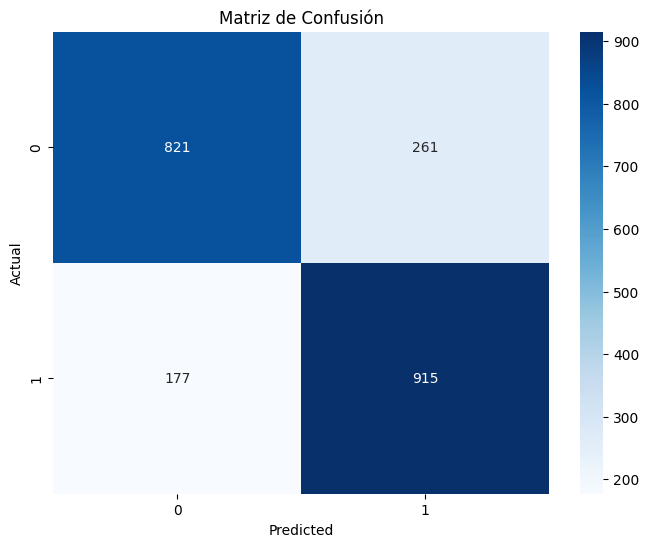

Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1082
           1       0.78      0.84      0.81      1092

    accuracy                           0.80      2174
   macro avg       0.80      0.80      0.80      2174
weighted avg       0.80      0.80      0.80      2174



In [48]:
# Importar las librerías necesarias
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Generar un dataset de ejemplo
X = train.drop(columns=['Transported'])
y = train['Transported']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Definir los parámetros para GridSearchCV para cada modelo

# Parámetros para XGBoost
xgb_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Parámetros para CatBoost
catboost_params = {
    'iterations': [50, 100, 200],
    'depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Parámetros para LightGBM
lgbm_params = {
    'n_estimators': [50, 100, 200],
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Parámetros para RandomForest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7, 9]
}

# Parámetros para LogisticRegression
lr_params = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['lbfgs'],
    'max_iter': [100, 200, 300]
}


# Definir los clasificadores base sin ajuste
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
catboost = CatBoostClassifier(verbose=0, random_state=42)
lgbm = LGBMClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(random_state=42)

# Realizar el GridSearchCV para cada modelo
print("Buscando mejores hiperparámetros para XGBoost...")
xgb_grid = GridSearchCV(xgb, xgb_params, cv=3, scoring='accuracy', verbose=1)
xgb_grid.fit(X_train, y_train)
print(f"Mejores hiperparámetros para XGBoost: {xgb_grid.best_params_}")

print("Buscando mejores hiperparámetros para CatBoost...")
catboost_grid = GridSearchCV(catboost, catboost_params, cv=3, scoring='accuracy', verbose=1)
catboost_grid.fit(X_train, y_train)
print(f"Mejores hiperparámetros para CatBoost: {catboost_grid.best_params_}")

print("Buscando mejores hiperparámetros para LightGBM...")
lgbm_grid = GridSearchCV(lgbm, lgbm_params, cv=3, scoring='accuracy', verbose=1)
lgbm_grid.fit(X_train, y_train)
print(f"Mejores hiperparámetros para LightGBM: {lgbm_grid.best_params_}")

# Realizar el GridSearchCV para RandomForest
print("Buscando mejores hiperparámetros para RandomForest...")
rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='accuracy', verbose=1)
rf_grid.fit(X_train, y_train)
print(f"Mejores hiperparámetros para RandomForest: {rf_grid.best_params_}")

# Realizar el GridSearchCV para LogisticRegression
print("Buscando mejores hiperparámetros para LogisticRegression...")
lr_grid = GridSearchCV(lr, lr_params, cv=3, scoring='accuracy', verbose=1)
lr_grid.fit(X_train, y_train)
print(f"Mejores hiperparámetros para LogisticRegression: {lr_grid.best_params_}")

# Usar los mejores modelos en el VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('xgb', xgb_grid.best_estimator_),
    ('catboost', catboost_grid.best_estimator_),
    ('lgbm', lgbm_grid.best_estimator_),
    ('rf', rf_grid.best_estimator_),
    ('lr', lr_grid.best_estimator_)
], voting='hard')  # Puedes cambiar a 'soft' si deseas usar promedios de probabilidades

# Entrenar el VotingClassifier
voting_clf.fit(X_train, y_train)

# Realizar predicciones
y_pred = voting_clf.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del Voting Classifier: {accuracy:.2f}")

# Mostrar la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Mostrar el reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de clasificación:")
print(report)

In [49]:
voting_clf

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learni...
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('catboost',
                              <catboost.core.CatBoostClassifier object at 0x369dfcb60>),
                             ('lgbm',
                              LGBMClassifier(n_estimators=50, random_state=42)),
                             ('rf',
                              RandomForestClassifier(max_depth=9,
                                                     n_estimators=200,
                                                     random_state=42)),
                             ('lr',
                              LogisticRegression(C=0.1, max_iter=300,
                                                 random_state=42))])

# Test

In [49]:
test = pd.read_csv('test.csv')
test.drop(columns=['Name'],inplace=True)

In [50]:
# Define columns
test[amenities] = test[amenities].fillna(0)
test['Amenities'] = test[amenities].sum(axis=1)

test[['GroupId', 'PassengerNumber']] = test['PassengerId'].str.split('_', expand=True)
test['PassengerNumber'] = test['PassengerNumber'].astype(int)
test['GroupId'] = test['GroupId'].astype(int)
test.drop(columns=['PassengerId'],inplace=True)

test[['Zone', 'Seat', 'Side']] = test['Cabin'].str.split('/', expand=True)
test.drop(columns=['Cabin'], inplace=True)

In [51]:
# Treat NaN

test['HomePlanet']= test['HomePlanet'].replace('Earth',0)
test['HomePlanet']= test['HomePlanet'].replace('Mars',1)
test['HomePlanet']= test['HomePlanet'].replace('Europa',2)
test['HomePlanet'] = test['HomePlanet'].fillna(1)

test['CryoSleep'] = test['CryoSleep'].fillna(test.apply(lambda row: False if any(row[amenities] > 0) else True, axis=1))
test['CryoSleep'] = test['CryoSleep'].astype(bool)

test['Destination']= test['Destination'].replace('TRAPPIST-1e',0)
test['Destination']= test['Destination'].replace('55 Cancri e',1)
test['Destination']= test['Destination'].replace('PSO J318.5-22',2)
test['Destination'].value_counts()

test['Destination'] = test['Destination'].fillna(0)

test['age_group'] = np.where(pd.isna(test['Age']), np.nan, np.where(test['Age'] < 18, 0, 1))
test['age_group'] = test['age_group'].fillna(1)
test.drop(columns=['Age'],inplace=True)

test['VIP'] = test['VIP'].fillna(0)
test['VIP'] = test['VIP'].astype(int)

test['Side'] = test['Side'].replace('S',0)
test['Side'] = test['Side'].replace('P',1)

# Mitad 0, mitad 1 debido a que la distribución en todas las variables es casi idéntica
nan_indices = test[test['Side'].isna()].index

# Convertir los índices a una lista para hacerlos mutables
nan_indices_list = list(nan_indices)

# Mezclar aleatoriamente los índices
np.random.shuffle(nan_indices_list)

# Dividir los índices en dos mitades
half = len(nan_indices_list) // 2

# Asignar 0 a la primera mitad y 1 a la segunda mitad
test.loc[nan_indices_list[:half], 'Side'] = 0
test.loc[nan_indices_list[half:], 'Side'] = 1

test['Zone'].replace('G', 0, inplace=True)
test['Zone'].replace('F', 1, inplace=True)
test['Zone'].replace('E', 2, inplace=True)
test['Zone'].replace('D', 3, inplace=True)
test['Zone'].replace('B', 4, inplace=True)
test['Zone'].replace('A', 5, inplace=True)
test['Zone'].replace('C', 6, inplace=True)
test['Zone'].replace('T', 7, inplace=True)

zone_means = {
    0: np.array([71.439625, 78.076592, 69.087143, 87.917937, 74.513873]),
    1: np.array([302.185755, 142.406586, 234.280243, 161.430565, 142.463135]),
    2: np.array([306.692922, 263.061644, 226.280822, 265.131279, 237.606164]),
    3: np.array([660.018828, 581.583682, 305.476987, 460.830544, 281.610879]),
    4: np.array([84.148909, 1238.555841, 149.083440, 714.468549, 741.576380]),
    5: np.array([133.039062, 1541.539062, 110.062500, 693.250000, 924.414062]),
    6: np.array([178.016064, 1788.607764, 171.340027, 905.384203, 1062.558233]),
    7: np.array([427.2, 1397.4, 0.4, 2008.4, 883.0])
}

# Calcular la suma de las amenidades para las filas con Zone NaN
test['amenity_sum'] = test[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].sum(axis=1)

# Para las filas con Zone NaN, asignar la zona basada en la cercanía a los promedios
def assign_zone(row):
    if pd.isna(row['Zone']):
        amenity_values = row[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].values
        # Calcular la distancia euclidiana entre los pagos y los promedios de cada zona
        distances = {zone: np.linalg.norm(amenity_values - means) for zone, means in zone_means.items()}
        # Asignar la zona con la menor distancia
        return min(distances, key=distances.get)
    return row['Zone']

# Aplicar la función para asignar las zonas
test['Zone'] = test.apply(assign_zone, axis=1)

test.drop(columns=['Seat','amenity_sum'],inplace=True)

/var/folders/00/71bxx4k17bdbgdqtr4ng1w4c0000gn/T/ipykernel_7721/2316639243.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['HomePlanet']= test['HomePlanet'].replace('Europa',2)
/var/folders/00/71bxx4k17bdbgdqtr4ng1w4c0000gn/T/ipykernel_7721/2316639243.py:8: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  test['CryoSleep'] = test['CryoSleep'].fillna(test.apply(lambda row: False if any(row[amenities] > 0) else True, axis=1))
/var/folders/00/71bxx4k17bdbgdqtr4ng1w4c0000gn/T/ipykernel_7721/2316639243.py:13: FutureWarning: Downcasting behav

In [52]:
test

,HomePlanet,CryoSleep,Destination,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Amenities,GroupId,PassengerNumber,Zone,Side,age_group
0,0.0,True,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,13,1,0.0,0.0,1.0
1,0.0,False,0.0,0,0.0,9.0,0.0,2823.0,0.0,2832.0,18,1,1.0,0.0,1.0
2,2.0,True,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,19,1,6.0,0.0,1.0
3,2.0,False,0.0,0,0.0,6652.0,0.0,181.0,585.0,7418.0,21,1,6.0,0.0,1.0
4,0.0,False,0.0,0,10.0,0.0,635.0,0.0,0.0,645.0,23,1,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.0,True,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,9266,2,0.0,0.0,1.0
4273,0.0,False,0.0,0,0.0,847.0,17.0,10.0,144.0,1018.0,9269,1,2.0,0.0,1.0
4274,1.0,True,1.0,0,0.0,0.0,0.0,0.0,0.0,0.0,9271,1,3.0,1.0,1.0
4275,2.0,False,0.0,0,0.0,2680.0,0.0,0.0,523.0,3203.0,9273,1,3.0,1.0,1.0


In [736]:
preds = voting_clf.predict(test)
final_preds = preds.astype(bool)
len(final_preds)

4277

In [737]:
preds = pd.DataFrame(final_preds)
ids = pd.read_csv('test.csv')
ids = ids[['PassengerId']]
ids['Transported'] = final_preds
ids.to_csv('preds_more_test.csv',index=False)

**0.80617 en Kaggle**